In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Question
The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

1) whether the wine is red or white
2) the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

### Data Exploration

In [2]:
#Reading the wine data fron the given file:

wineData = pd.read_csv("wine.csv")
wineData.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [3]:
wineData.shape

(6497, 13)

In [4]:
wineData.describe().T

count        mean        std      min       25%  \
fixed.acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile.acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric.acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual.sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free.sulfur.dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total.sulfur.dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed.acidity           7.00000    7.70000   15.90000  
volatile.acidity        0.29000    0.40000    1.58000  
citric.acid             0.31000    0.39000    1.66000  
residual.sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free.sulfur.dioxide    29.00000   41.00000  289.00000  
total.sulfur.dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

#### Data visualization

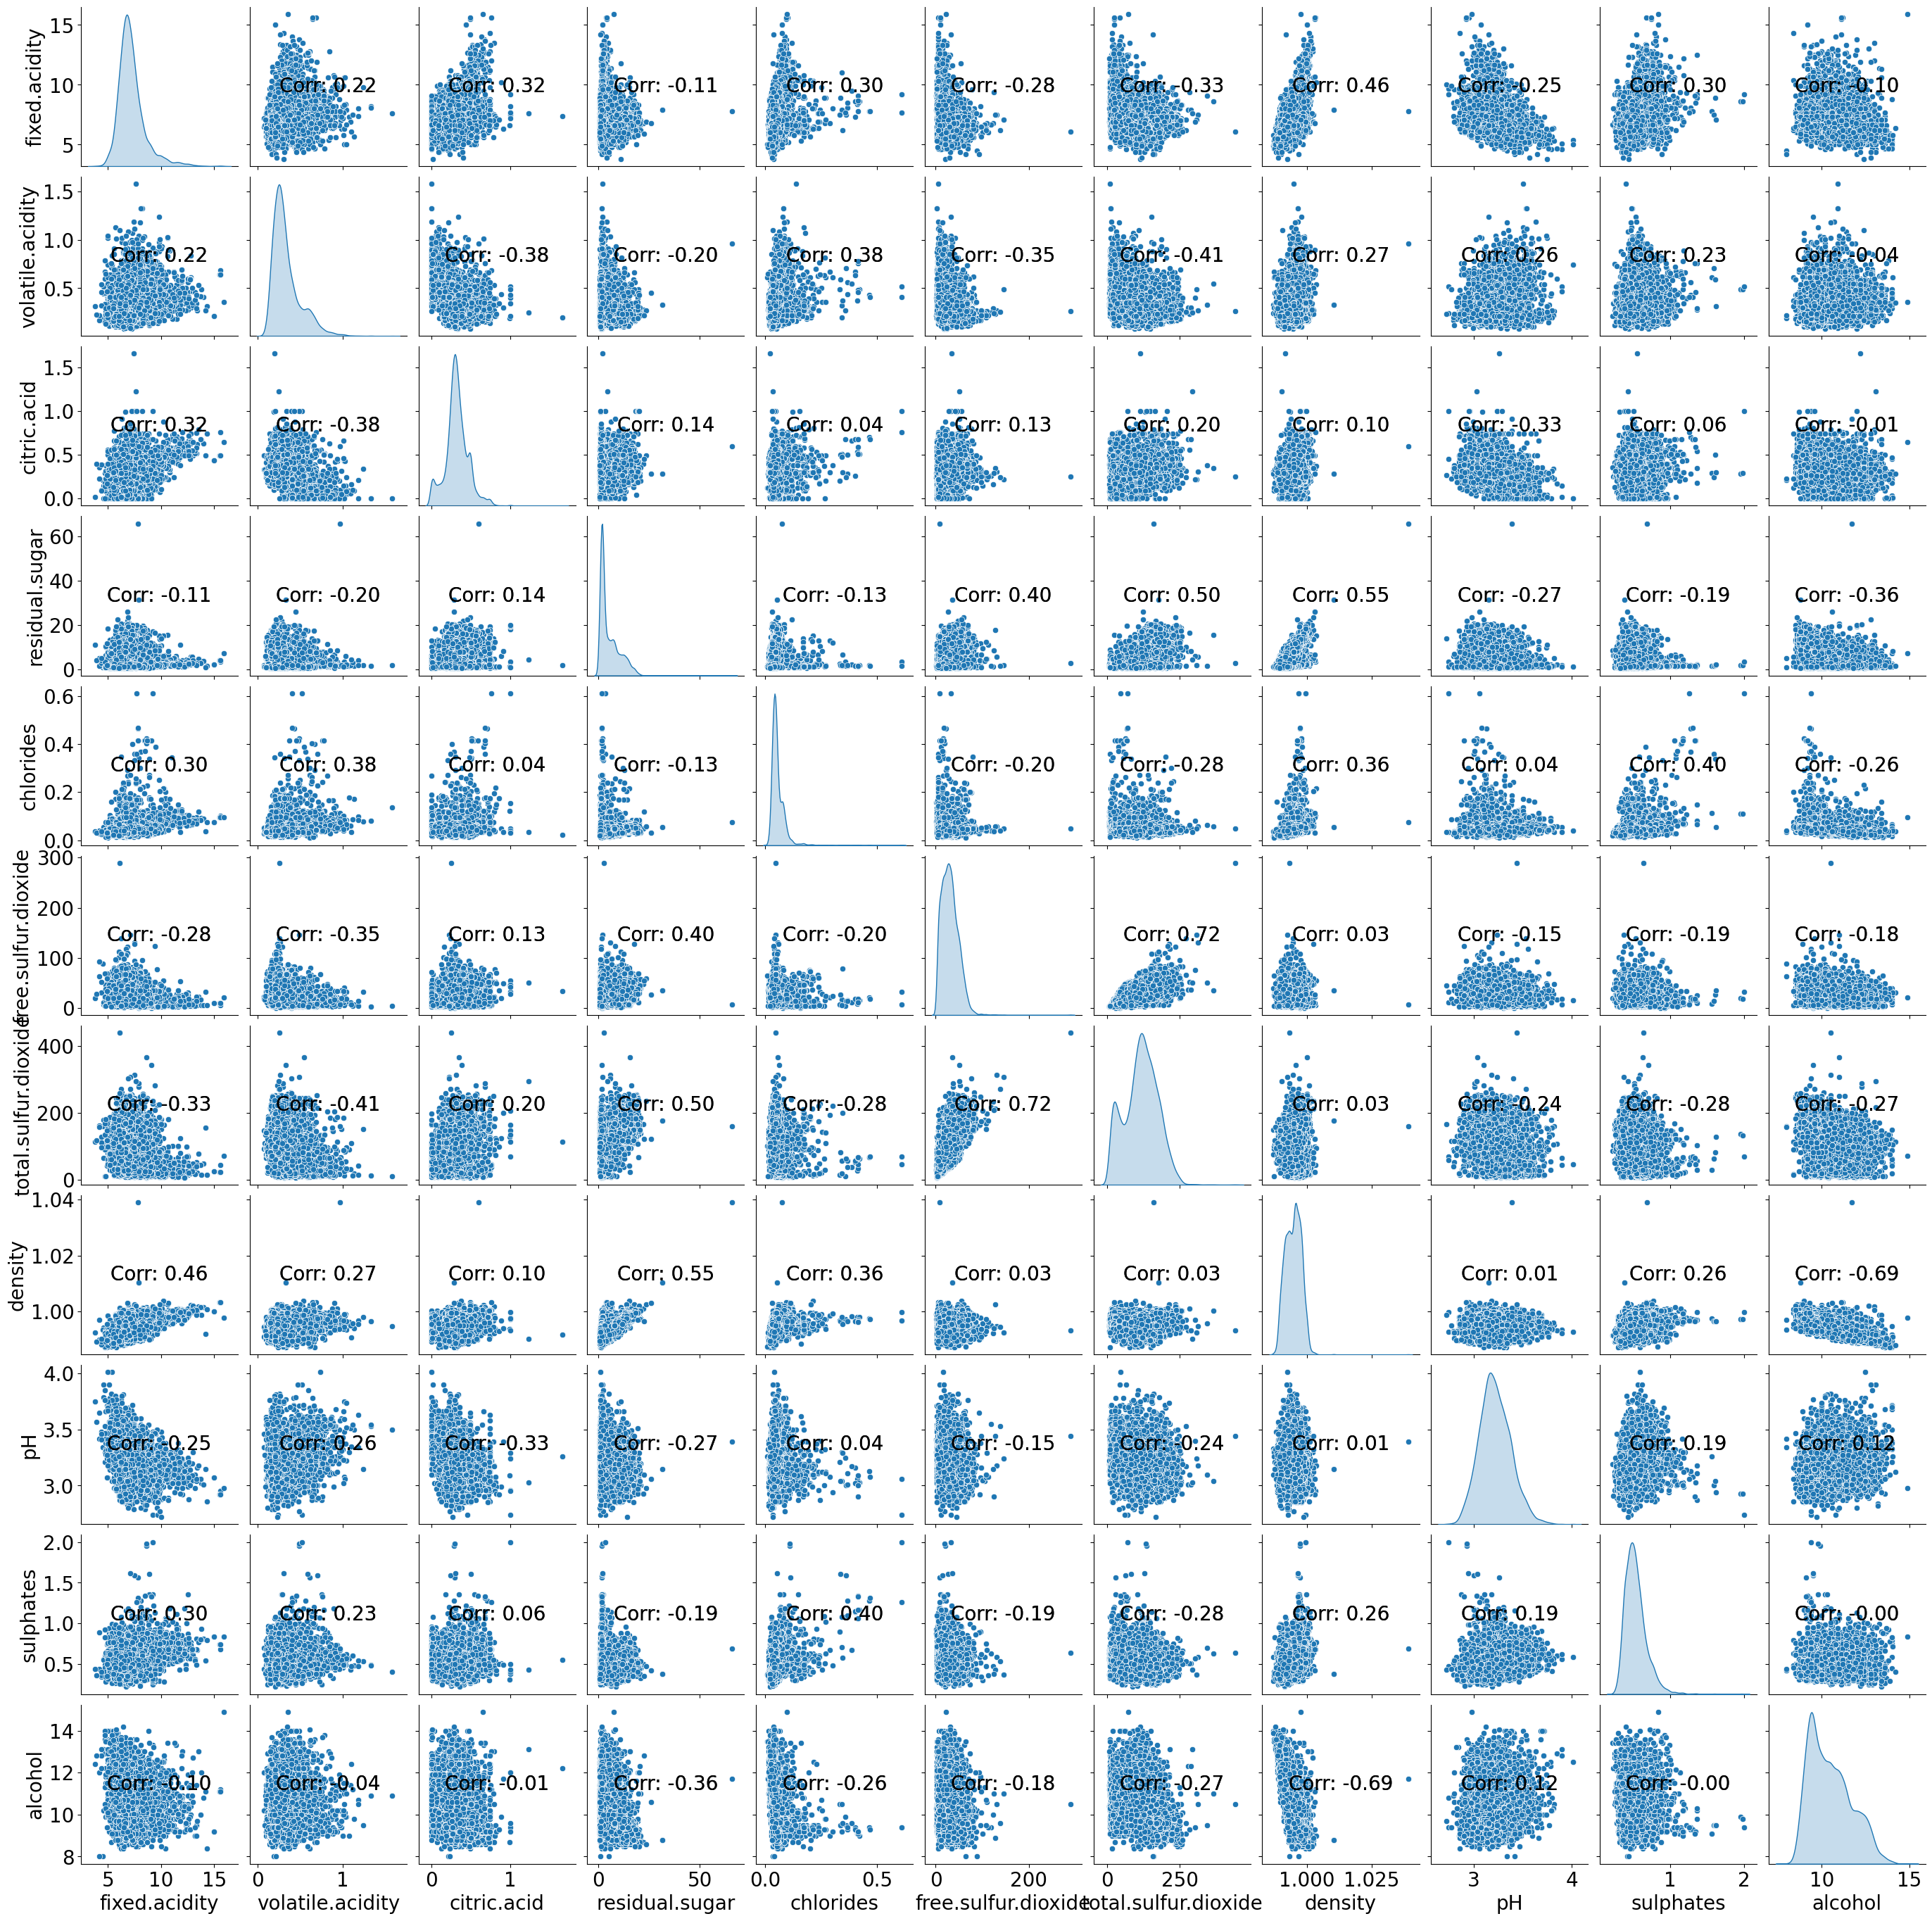

In [5]:
# Define columns for visualization
cols_to_viz = ["fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar",
               "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide",
               "density", "pH", "sulphates", "alcohol"]

# Generate pairplot for the defined columns
wine_pairplot = sns.pairplot(wineData[cols_to_viz], diag_kind="kde", markers="o")

# Calculate correlations for the defined columns
correlation_mtx = wineData[cols_to_viz].corr()

# Annotate pairplots with correlation values
for i, (row_axes, col_axes) in enumerate(zip(wine_pairplot.axes, wine_pairplot.axes.T)):
    for j, (ax1, ax2) in enumerate(zip(row_axes, col_axes)):
        if i != j:
            corr_val = correlation_mtx.iloc[i, j]
            ax1.annotate(f"Corr: {corr_val:.2f}", (0.5, 0.5), 
                         xycoords="axes fraction", va="center", ha="center", fontsize=20)
            ax2.annotate(f"Corr: {corr_val:.2f}", (0.5, 0.5), 
                         xycoords="axes fraction", va="center", ha="center", fontsize=20)

# Adjust font size for readability
for ax in wine_pairplot.axes.flatten():
    ax.tick_params(labelsize=20)  # Adjust tick font size
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)  # Adjust x-axis font size
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)  # Adjust y-axis font size
            
# Render the annotated pairplot
plt.show()


C:\Users\Amey\anaconda3\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\Users\Amey\anaconda3\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=

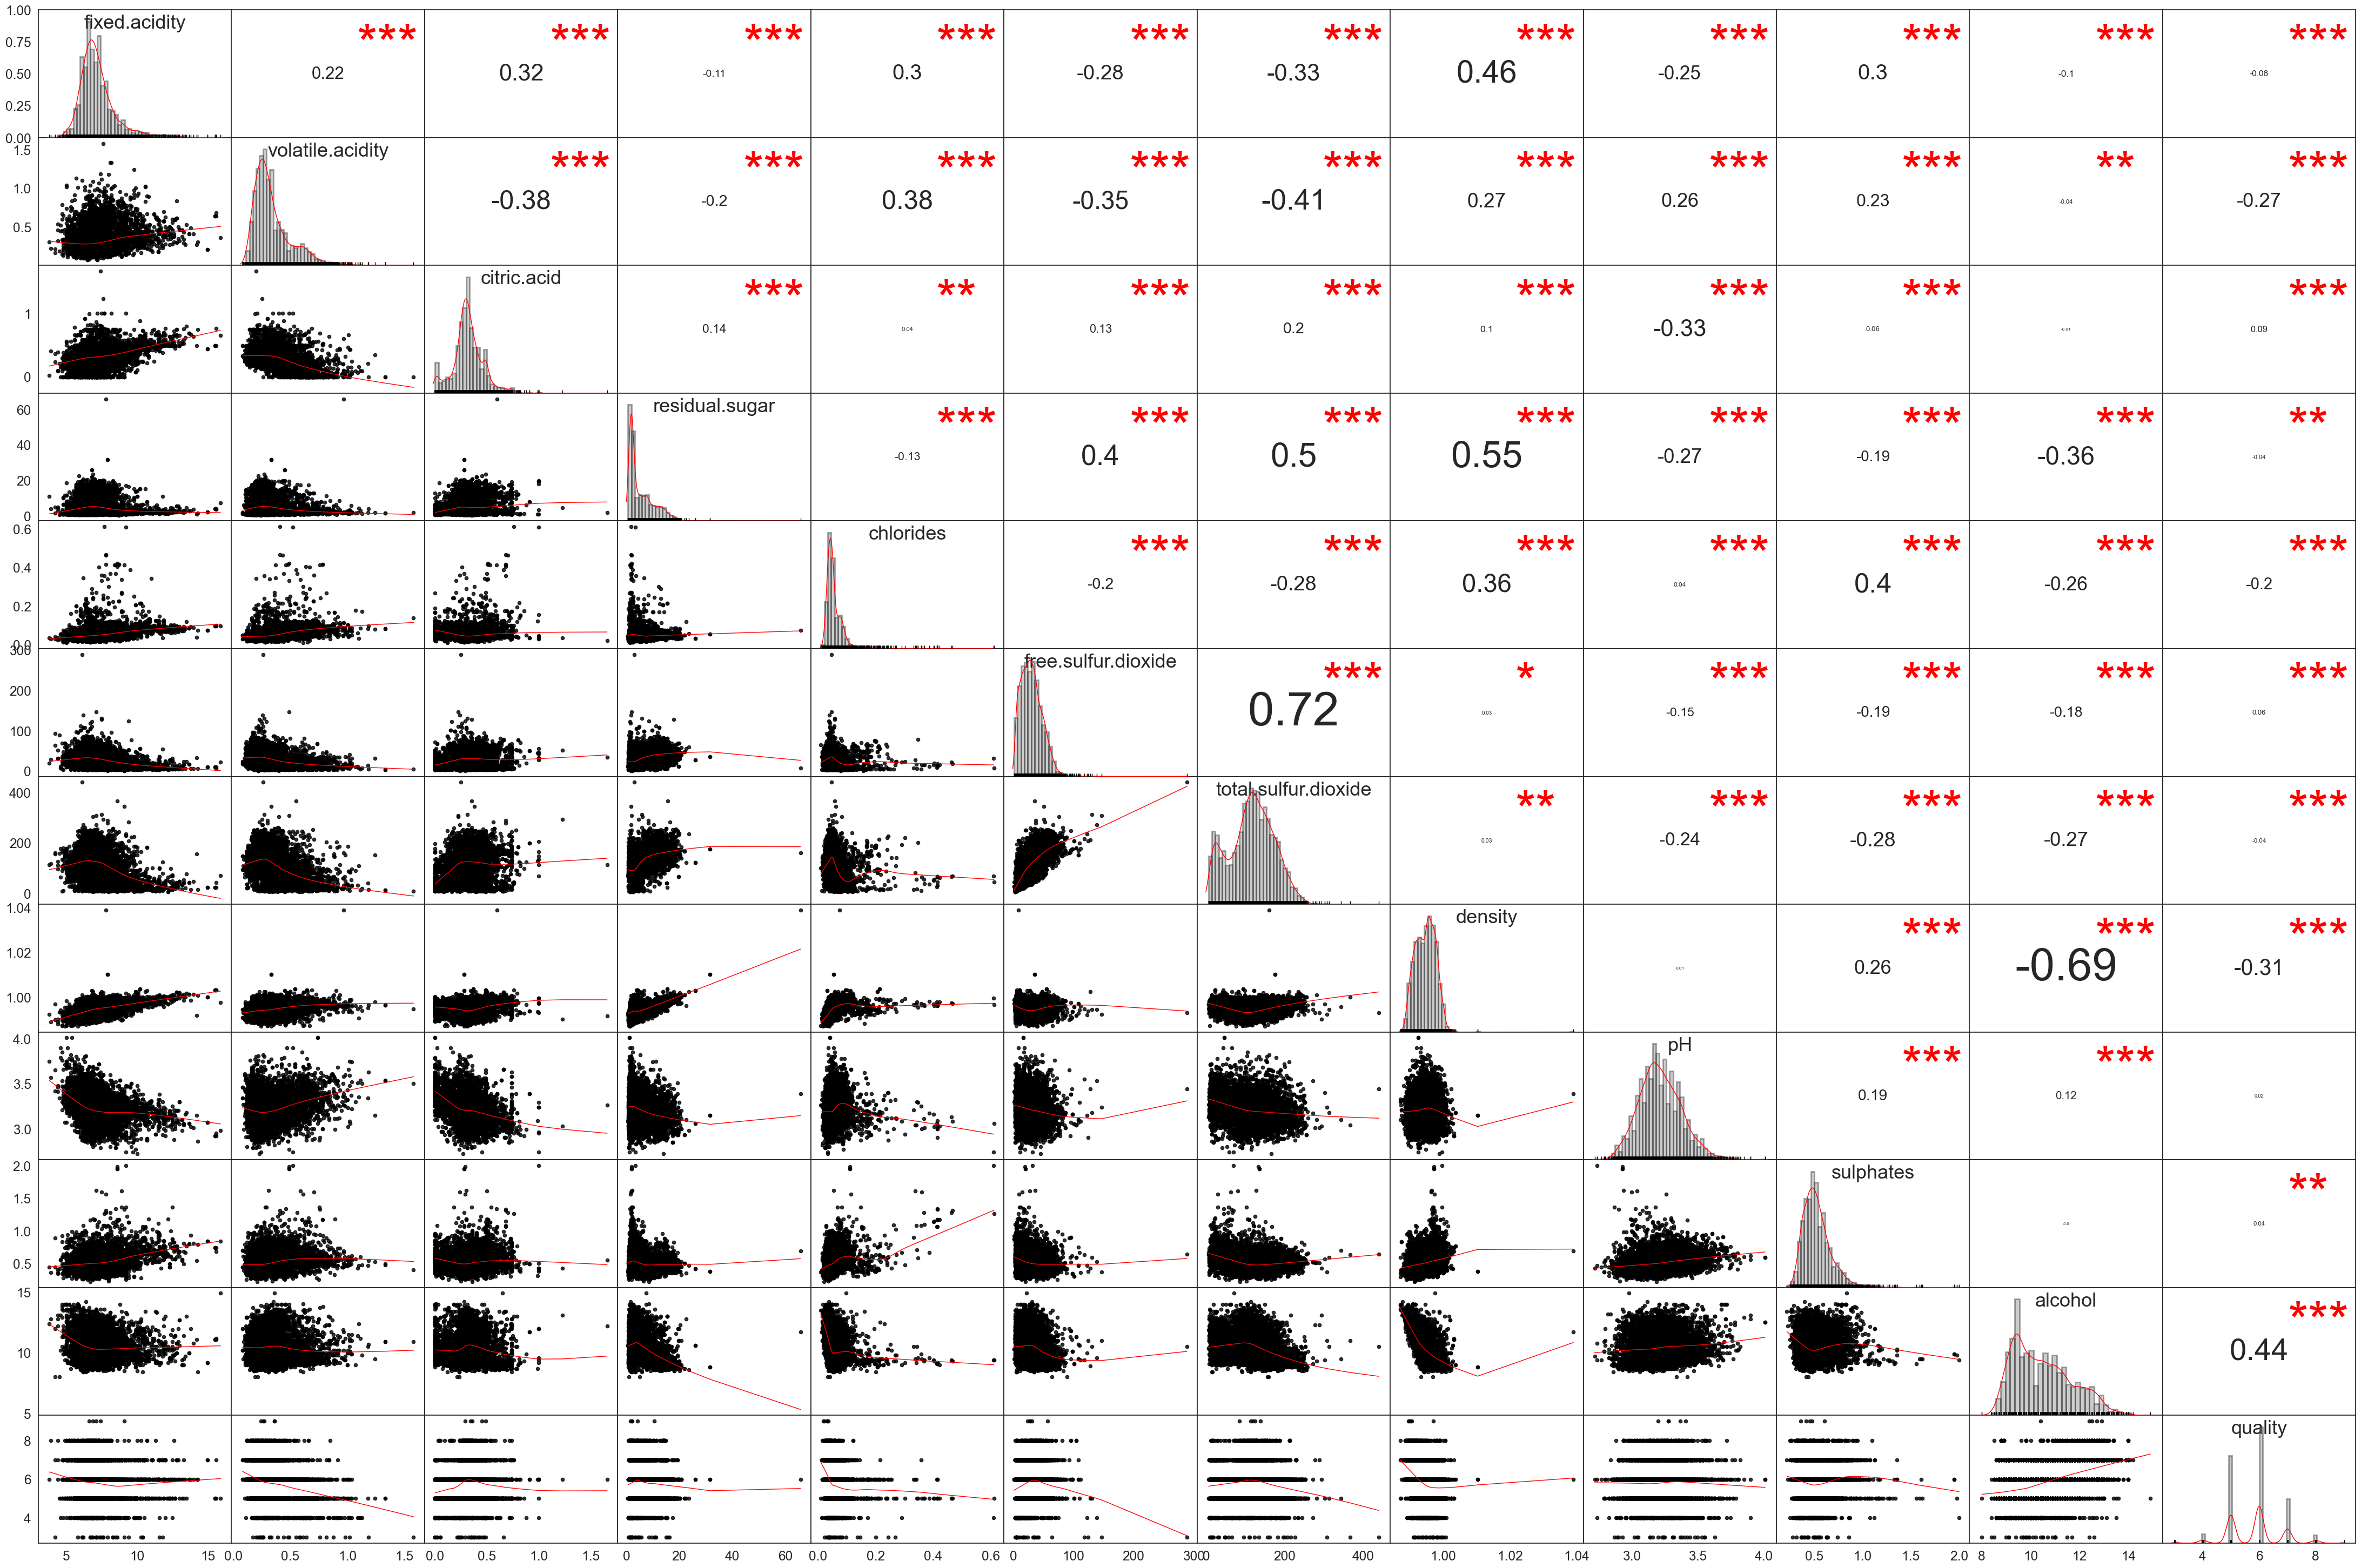

In [6]:
from scipy import stats
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(wineData, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), wineData.columns):
    ax.set_title(col, y=0.82, fontsize=26)

In [8]:
#Check for the covariance - if there is a high covariance between variables then it is a desirable for PCAs

# Calculate the covariance between each pair of columns using numpy
covariance_matrix = np.cov(wineData[cols_to_viz], rowvar=False)

# Create a DataFrame to display the covariance matrix
covariance_df = pd.DataFrame(covariance_matrix, columns=cols_to_viz, index=cols_to_viz)

# Display the covariance DataFrame
print("Covariance Matrix:")
print(covariance_df)

Covariance Matrix:
                      fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.680740          0.046745     0.061122   
volatile.acidity           0.046745          0.027105    -0.009043   
citric.acid                0.061122         -0.009043     0.021117   
residual.sugar            -0.690720         -0.153537     0.098490   
chlorides                  0.013544          0.002175     0.000199   
free.sulfur.dioxide       -6.506003         -1.030242     0.343372   
total.sulfur.dioxide     -24.112030         -3.856933     1.603646   
density                    0.001784          0.000134     0.000042   
pH                        -0.052675          0.006921    -0.007706   
sulphates                  0.057792          0.005536     0.001215   
alcohol                   -0.147594         -0.007391    -0.001819   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity              -0.690720   0.013544            -6.506003

### PCA

In [10]:
#Running the PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract the selected columns
wine_selected = wineData.select_dtypes(include='number').drop(columns=["quality"])

# Standardize the data (center and scale)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_selected)

# Perform PCA
n_components = wine_selected.shape[1]  # Number of components
pca = PCA(n_components=n_components)
pc = pca.fit_transform(wine_scaled)

#Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a summary DataFrame
summary_data = {'Principal Component': range(1, n_components + 1),
                'Explained Variance Ratio': explained_variance_ratio,
                'Cumulative Variance Ratio': np.cumsum(explained_variance_ratio)}

summary_df = pd.DataFrame(summary_data)

print(summary_df)

    Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                     1                  0.275443                   0.275443
1                     2                  0.226711                   0.502154
2                     3                  0.141486                   0.643640
3                     4                  0.088232                   0.731872
4                     5                  0.065443                   0.797315
5                     6                  0.055210                   0.852525
6                     7                  0.047560                   0.900085
7                     8                  0.045592                   0.945677
8                     9                  0.030639                   0.976316
9                    10                  0.020700                   0.997015
10                   11                  0.002985                   1.000000


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.205996  0.416523 -2.722237 -0.796778  0.202877 -0.227363 -0.325554   
1 -3.039051  1.107462 -2.046952 -0.770225 -1.322655  1.655121  0.059559   
2 -3.071893  0.878964 -1.742580 -0.802257 -0.762112  0.848374  0.167670   

        PC8       PC9      PC10  ...  residual.sugar  chlorides  \
0 -0.567278  0.071229 -0.108046  ...             1.9      0.076   
1 -0.514603 -0.429129 -0.268149  ...             2.6      0.098   
2 -0.420952 -0.271032 -0.086832  ...             2.3      0.092   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  color  
0      9.4        5    red  
1      9.8        5    red  
2      9.8        5    red  

[3 rows x 24 col

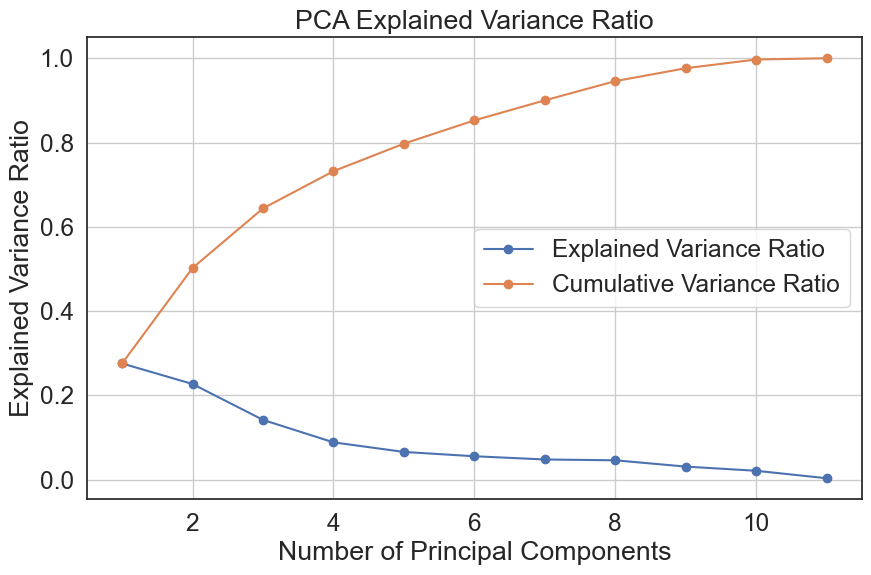

In [12]:
# Create a data frame containing the PCA components and the original wine data
wine_master = pd.concat([pd.DataFrame(pc, columns=[f"PC{i+1}" for i in range(pc.shape[1])]), wineData], axis=1)

# Display the first 3 rows of wine_master
print(wine_master.iloc[0:3, :])

# Plot the PCA explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.legend(['Explained Variance Ratio', 'Cumulative Variance Ratio'])
plt.grid()
plt.show()

In [19]:
pca

PCA(n_components=11)

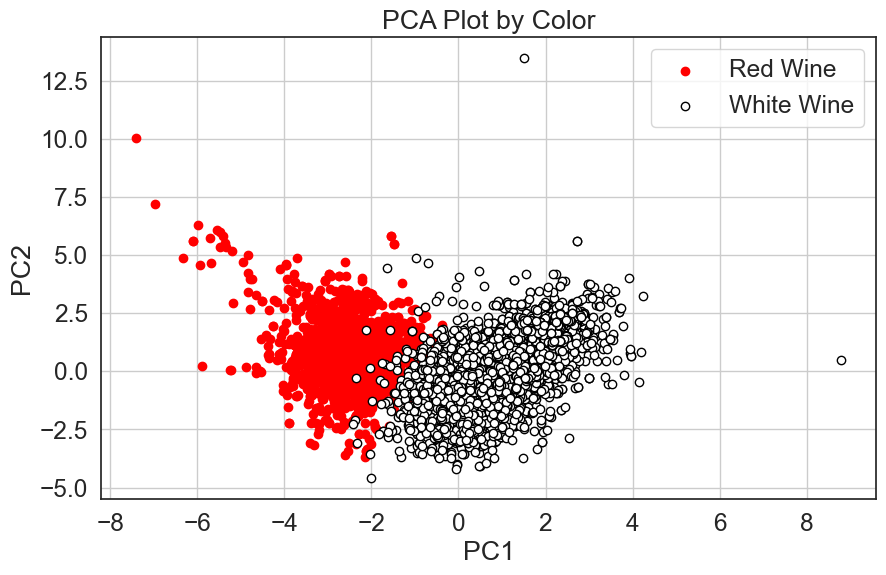

In [13]:
#Checking if colors are/can be easily identified

plt.figure(figsize=(10, 6))

# Plot red points
red_points = wine_master[wine_master['color'] == 'red']
plt.scatter(red_points['PC1'], red_points['PC2'], c='red', label='Red Wine')

# Plot white points
white_points = wine_master[wine_master['color'] == 'white']
plt.scatter(white_points['PC1'], white_points['PC2'], c='white', edgecolors='black', marker='o', label='White Wine')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot by Color')
plt.legend()
plt.grid() 

plt.show()

### Observation - 
The color is distinctly noticeable/we can differentiate it.

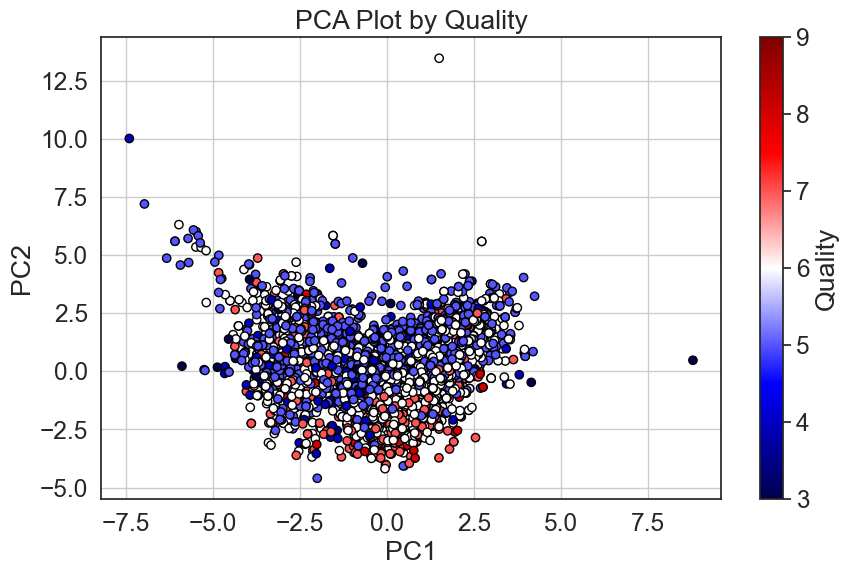

In [14]:
plt.figure(figsize=(10, 6))

# Create a scatter plot colored by 'quality'
plt.scatter(wine_master['PC1'], wine_master['PC2'], c=wine_master['quality'], cmap='seismic', edgecolors='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot by Quality')
plt.colorbar(label='Quality')
plt.grid()  # You can remove this line if you don't want gridlines

plt.show()

### Observation -
The distinction in quality isn't very pronounced.

### Conclusion
### PCA:
#### Color differentiation: 
The PCA plot indicates that the first two principal components do a pretty good job in distinguishing between red and white wines, as the two wine types form somewhat distinct clusters. This is promising for unsupervised learning methods.

#### Quality differentiation: 
When coloring by wine quality, the distinction isn't very clear, indicating that the wine's quality isn't strongly related to the first two principal components of the chemical properties.

### tSNE

In [16]:
from sklearn.manifold import TSNE

# Extract the selected columns
wine_selected = wineData.select_dtypes(include='number').drop(columns=["quality"])

# Standardize the data (center and scale)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_selected)

# Perform t-SNE
n_components = 2  # Number of components for t-SNE
tsne = TSNE(n_components=n_components, random_state=100)
tsne_result = tsne.fit_transform(wine_scaled)

# Create a DataFrame with t-SNE components
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"])

# Concatenate t-SNE components with original data
wine_tsne = pd.concat([tsne_df, wineData], axis=1)

# Display the first few rows of the t-SNE DataFrame
print("t-SNE Result:")
print(wine_tsne.head())

t-SNE Result:
      t-SNE1     t-SNE2  fixed.acidity  volatile.acidity  citric.acid  \
0 -76.951897  -2.807838            7.4              0.70         0.00   
1 -74.996696   9.224433            7.8              0.88         0.00   
2 -74.384491   9.413972            7.8              0.76         0.04   
3 -59.402363  49.558704           11.2              0.28         0.56   
4 -76.951767  -2.806930            7.4              0.70         0.00   

   residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  quality color  
0   0.9978  3.51       0.56      9.4      

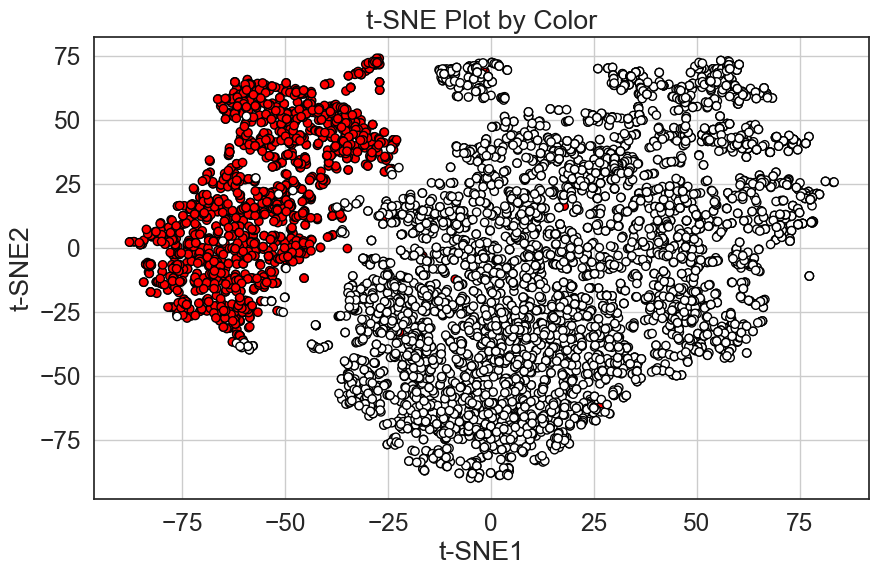

In [17]:
# Plot t-SNE visualization by color
plt.figure(figsize=(10, 6))
plt.scatter(wine_tsne['t-SNE1'], wine_tsne['t-SNE2'], c=wine_tsne['color'], edgecolors='black')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Plot by Color')
plt.grid()
plt.show()

### Observation - 
The color is distinctly noticeable/we can differentiate it.

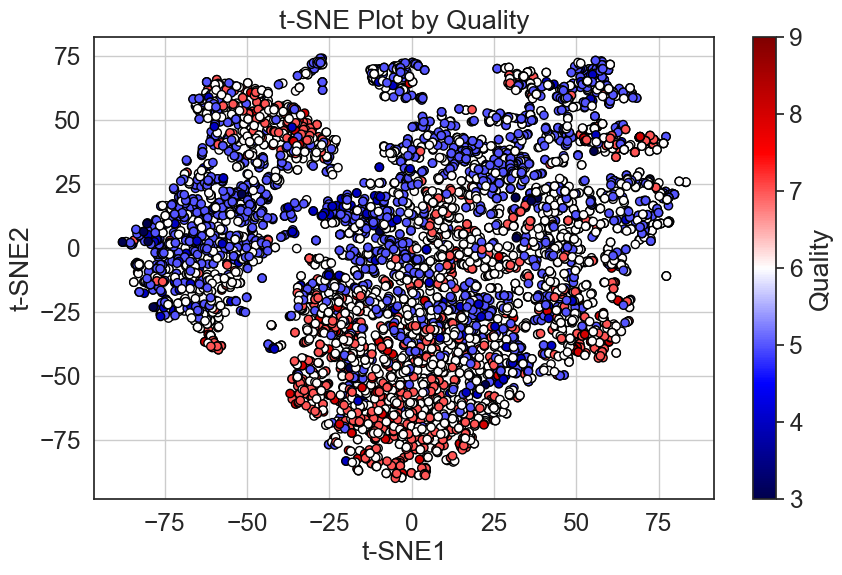

In [18]:
# Plot t-SNE visualization by quality
plt.figure(figsize=(10, 6))
plt.scatter(wine_tsne['t-SNE1'], wine_tsne['t-SNE2'], c=wine_tsne['quality'], cmap='seismic', edgecolors='black')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Plot by Quality')
plt.colorbar(label='Quality')
plt.grid()
plt.show()

### Observation -
The distinction in quality isn't very pronounced.

### Conclusion
### tSNE:
#### Color differentiation: 
The t-SNE visualization also shows a clear distinction between red and white wines. This suggests that t-SNE is useful in maintaining local similarities in the dataset, which is beneficial for color-based distinction.

#### Quality differentiation:
Similar to PCA, t-SNE doesn't seem to provide a clear differentiation in wine quality. This suggests that the variance in wine quality is not well captured by the t-SNE components derived from the chemical properties.

### K-means Clustering

In [21]:
#Standardizing variables first
from sklearn.preprocessing import StandardScaler

# Extract selected columns
X = wineData.drop(columns="color")

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with original column names and index
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(X_scaled_df.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol   quality  
0 -0.915464 -0.937230  
1 -0.580

#### Understanding the centre and spread of data

Mean:
fixed.acidity          -3.849639e-16
volatile.acidity        1.049902e-16
citric.acid             2.187295e-17
residual.sugar          3.499672e-17
chlorides               1.749836e-17
free.sulfur.dioxide    -8.749179e-17
total.sulfur.dioxide   -6.999344e-17
density                -3.552167e-15
pH                      2.729744e-15
sulphates              -5.424491e-16
alcohol                 9.974065e-16
quality                -3.105959e-16
dtype: float64

Standard Deviation:
fixed.acidity           1.000077
volatile.acidity        1.000077
citric.acid             1.000077
residual.sugar          1.000077
chlorides               1.000077
free.sulfur.dioxide     1.000077
total.sulfur.dioxide    1.000077
density                 1.000077
pH                      1.000077
sulphates               1.000077
alcohol                 1.000077
quality                 1.000077
dtype: float64


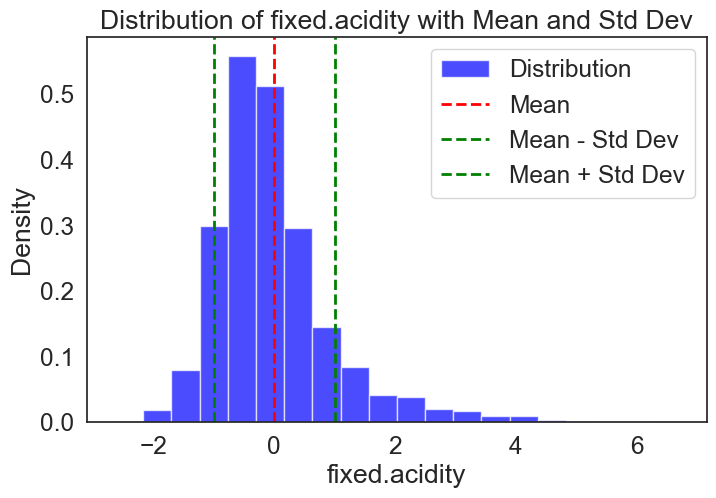

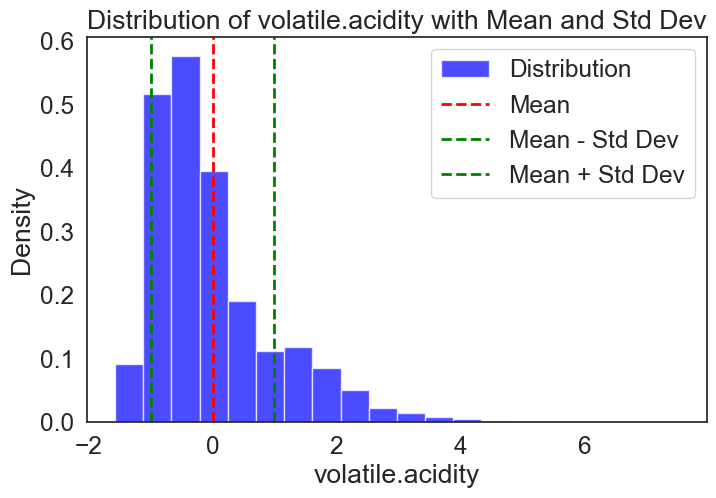

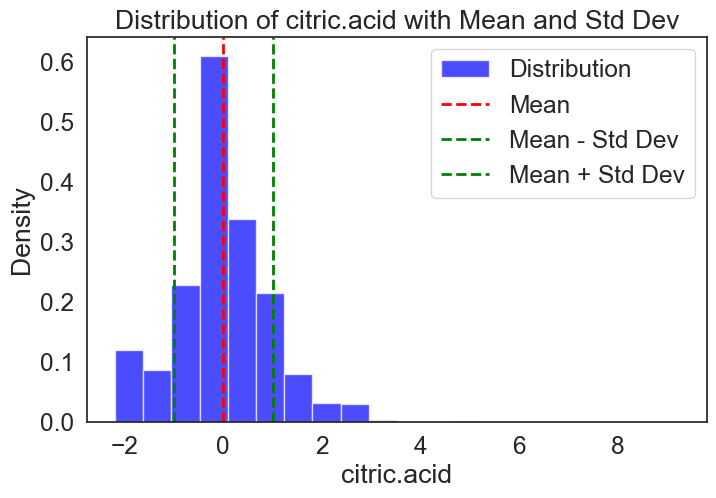

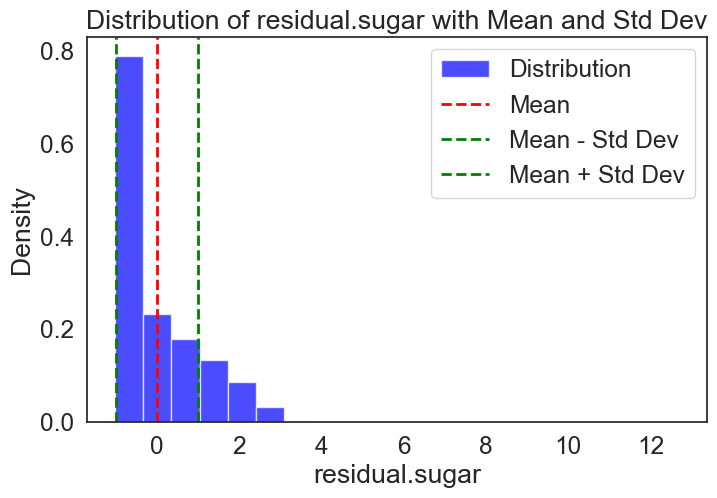

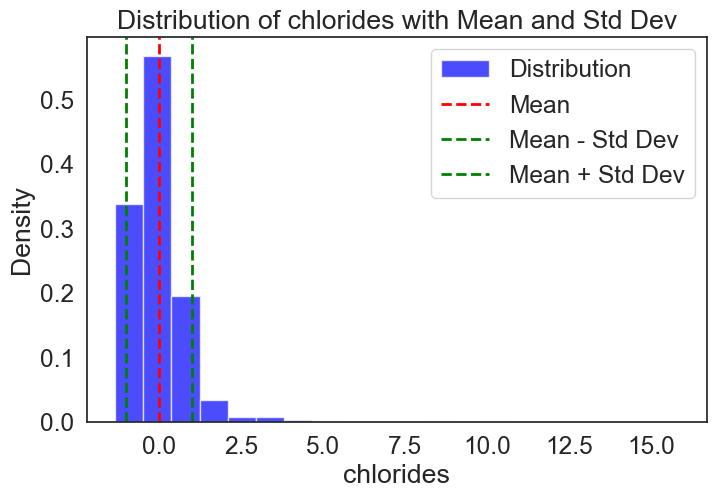

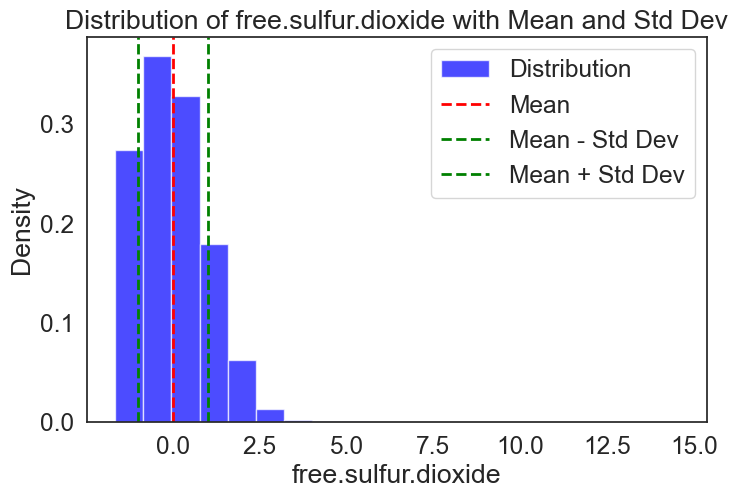

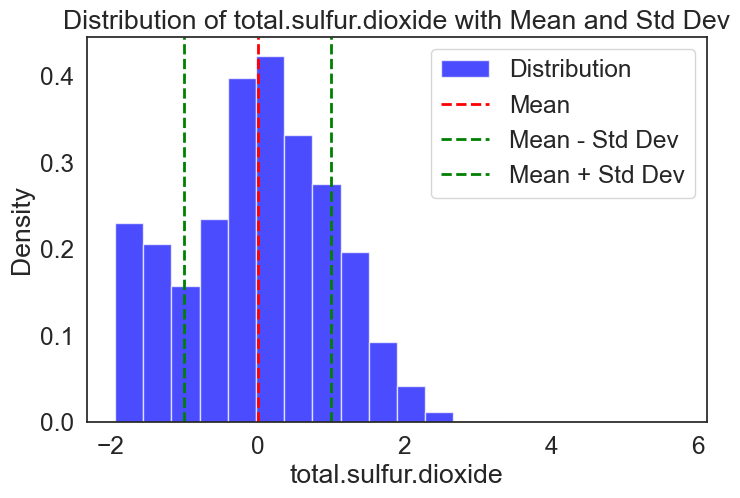

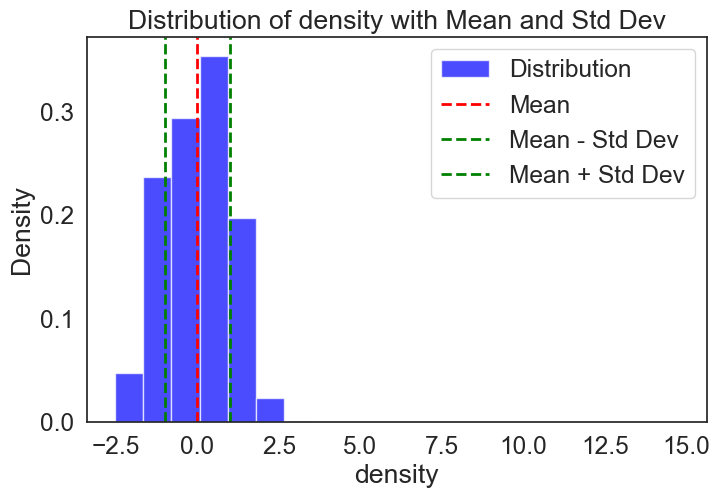

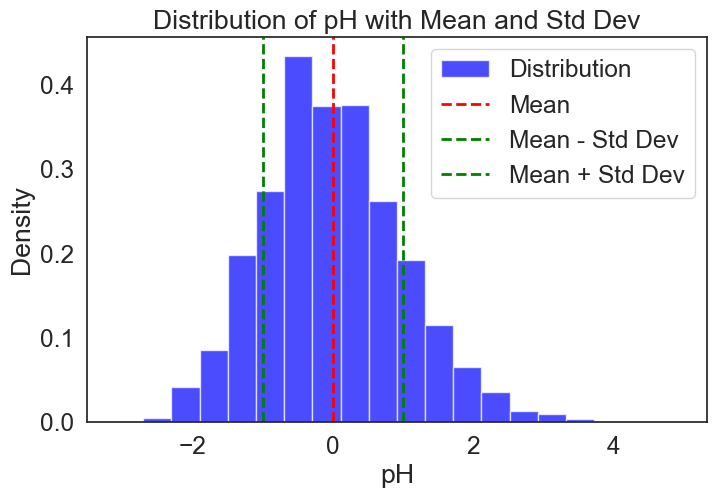

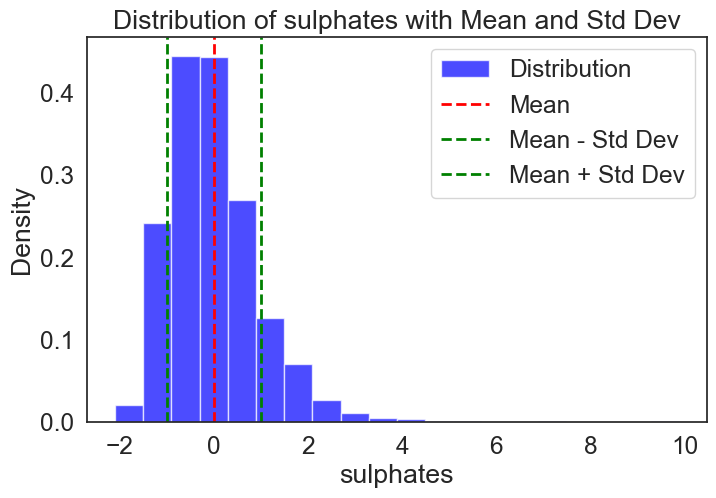

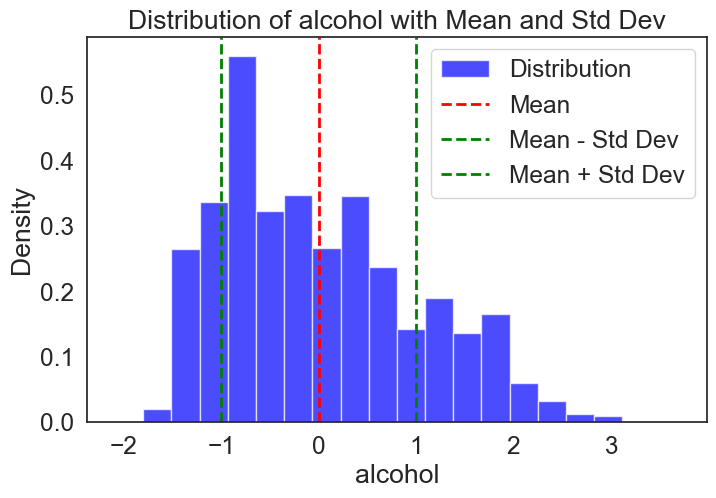

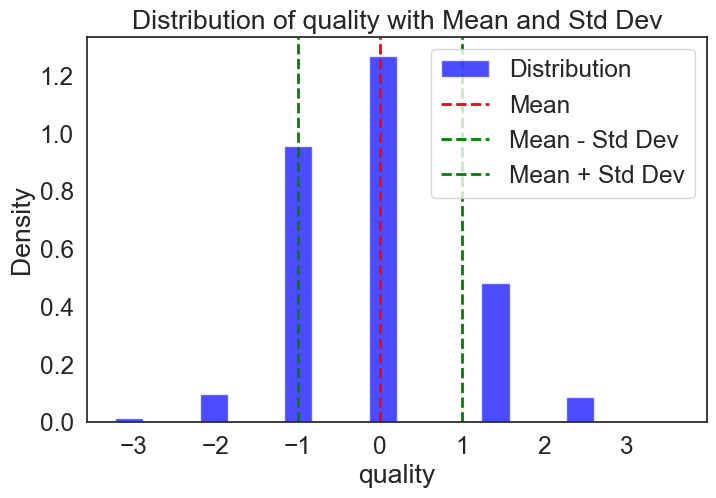

In [23]:
# Compute the mean and standard deviation
mu = X_scaled_df.mean()
sigma = X_scaled_df.std()

print("Mean:")
print(mu)

print("\nStandard Deviation:")
print(sigma)

import matplotlib.pyplot as plt

# Plot the distribution of each column along with mean and standard deviation
for column in X_scaled_df.columns:
    plt.figure(figsize=(8, 5))

    # Plot the histogram of the column
    plt.hist(X_scaled_df[column], bins=20, density=True, alpha=0.7, color='blue', label='Distribution')

    # Plot the mean and standard deviation
    plt.axvline(mu[column], color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(mu[column] - sigma[column], color='green', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
    plt.axvline(mu[column] + sigma[column], color='green', linestyle='dashed', linewidth=2, label='Mean + Std Dev')

    plt.title(f'Distribution of {column} with Mean and Std Dev')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

# Create a KMeans object with the specified number of clusters and n_init (nstart) value
num_clusters = 2
n_init = 30

kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(X_scaled_df)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[0 0 0 ... 1 1 1]


In [27]:
# Create a DataFrame with the cluster labels
clust_data = pd.DataFrame(cluster_labels, columns=['cluster'])

# Rename the column to 'Cluster'
clust_data.rename(columns={'cluster': 'Cluster'}, inplace=True)

# Convert the 'Cluster' column to numeric
clust_data['Cluster'] = pd.to_numeric(clust_data['Cluster'])

# Add the 'cluster' column to the 'wine' DataFrame
wineData['cluster'] = clust_data['Cluster']

# Create a cross-tabulation table
wine_clust_table = pd.crosstab(wineData['cluster'], wineData['color'], rownames=['Cluster'], colnames=['Color'])

print(wine_clust_table)

Color     red  white
Cluster             
0        1574     94
1          25   4804


In [29]:
# Calculate cluster accuracy
cluster_accuracy = round(100 * (wine_clust_table.iloc[0, 0] + wine_clust_table.iloc[1, 1]) / len(wineData))

print("Cluster Accuracy:", cluster_accuracy,"%")

Cluster Accuracy: 98 %


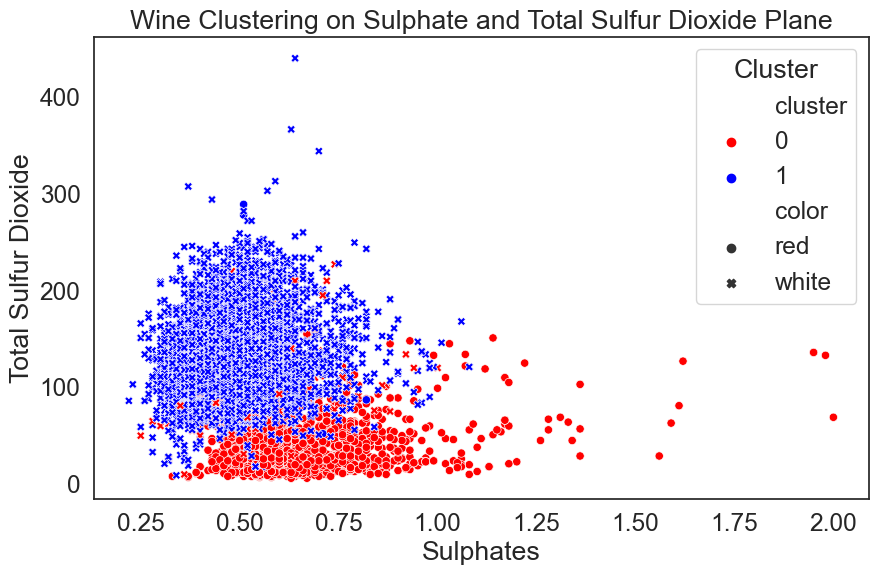

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
cluster_palette = {0: 'red', 1: 'blue'}
sns.scatterplot(data=wineData, x='sulphates', y='total.sulfur.dioxide', hue='cluster', style='color', palette=cluster_palette)
plt.title('Wine Clustering on Sulphate and Total Sulfur Dioxide Plane')
plt.xlabel('Sulphates')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Cluster')
plt.show()

### Observation

### K-means Clustering

A two-cluster configuration is selected, aiming to differentiate wines as either "red" or "white" solely based on their chemical characteristics.

### Cluster Distribution

Observing the cross-tabulation table:
The table offers insights into how wines are grouped versus their actual color designation.

### Accuracy
An impressive accuracy of 98% has been achieved. This high accuracy indicates the effectiveness of the K-means clustering in differentiating between red and white wines when number of clusters equals two.

### Trying the result for k=6

In [37]:
from sklearn.cluster import KMeans

# Create a KMeans object with 6 clusters and n_init (nstart) value of 25
num_clusters = 6
n_init = 25

kmeans_6 = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=0)

# Fit the KMeans model to the data
kmeans_6.fit(X_scaled_df)

# Get the cluster assignments for each data point
cluster_labels_6 = kmeans_6.labels_

print("Cluster Labels:")
print(cluster_labels_6)

Cluster Labels:
[4 4 4 ... 3 0 0]


Cluster 1 Center (Original Scale):
fixed.acidity          -0.465068
volatile.acidity       -0.380990
citric.acid             0.020933
residual.sugar         -0.384730
chlorides              -0.552169
free.sulfur.dioxide     0.055725
total.sulfur.dioxide   -0.026758
density                -1.145485
pH                      0.020498
sulphates              -0.249191
alcohol                 1.164561
quality                 0.939822
dtype: float64



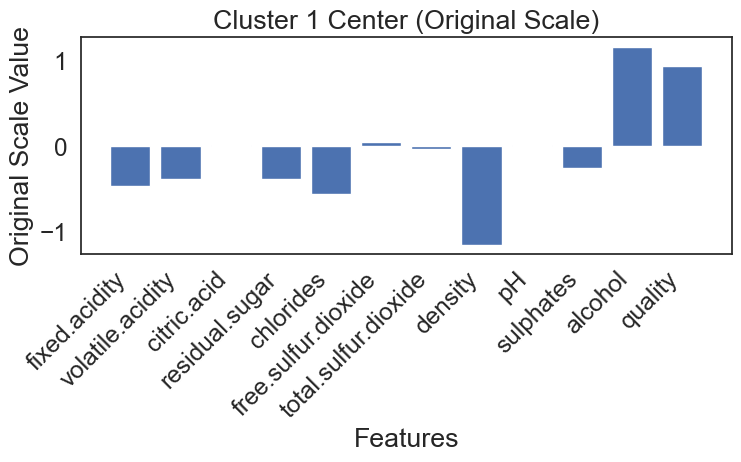

Cluster 2 Center (Original Scale):
fixed.acidity          -0.186827
volatile.acidity       -0.365116
citric.acid             0.292669
residual.sugar          1.386950
chlorides              -0.148076
free.sulfur.dioxide     0.947257
total.sulfur.dioxide    1.025824
density                 0.878911
pH                     -0.419219
sulphates              -0.247463
alcohol                -0.845258
quality                -0.235777
dtype: float64



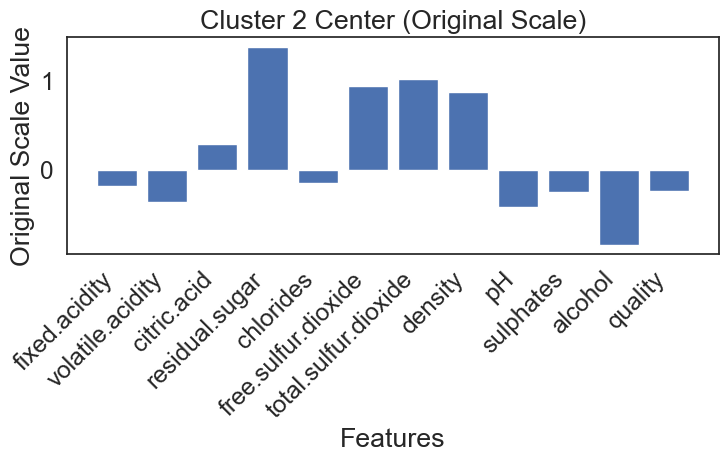

Cluster 3 Center (Original Scale):
fixed.acidity           2.084414
volatile.acidity        0.375906
citric.acid             1.008465
residual.sugar         -0.565926
chlorides               0.824697
free.sulfur.dioxide    -0.918009
total.sulfur.dioxide   -1.323698
density                 0.948577
pH                     -0.027228
sulphates               1.291169
alcohol                 0.156061
quality                 0.139181
dtype: float64



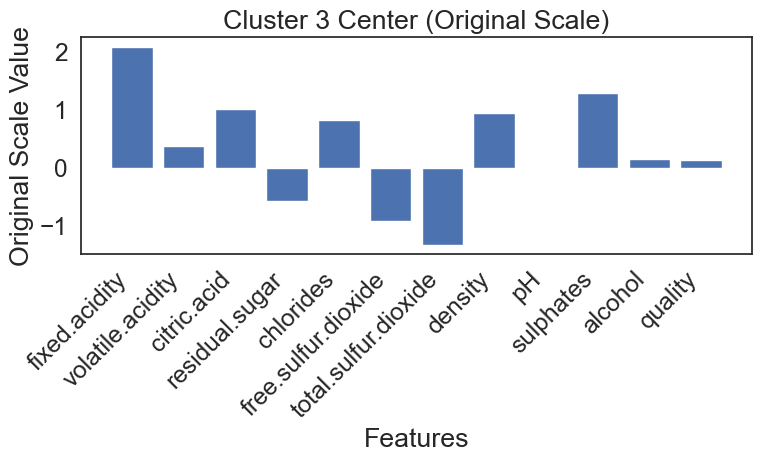

Cluster 4 Center (Original Scale):
fixed.acidity          -0.191459
volatile.acidity       -0.435443
citric.acid             0.046278
residual.sugar         -0.362678
chlorides              -0.192148
free.sulfur.dioxide    -0.152821
total.sulfur.dioxide    0.203556
density                -0.365428
pH                     -0.152735
sulphates              -0.305974
alcohol                -0.236732
quality                -0.431893
dtype: float64



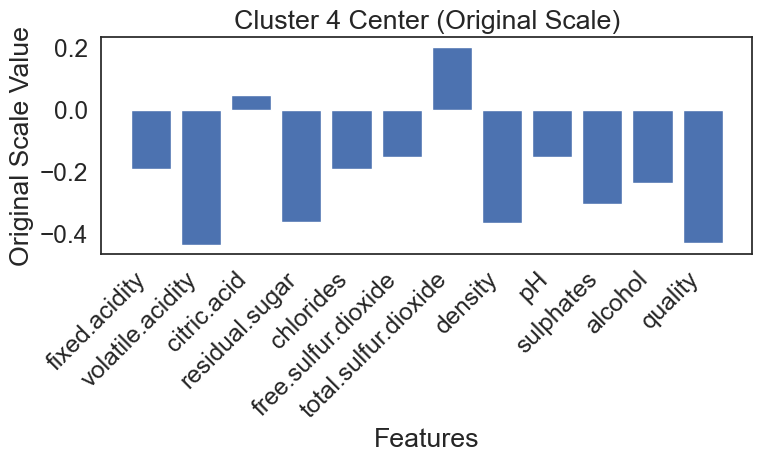

Cluster 5 Center (Original Scale):
fixed.acidity           0.106932
volatile.acidity        1.693738
citric.acid            -1.239320
residual.sugar         -0.617061
chlorides               0.689162
free.sulfur.dioxide    -0.778613
total.sulfur.dioxide   -1.118293
density                 0.516615
pH                      0.941809
sulphates               0.426610
alcohol                -0.263017
quality                -0.531839
dtype: float64



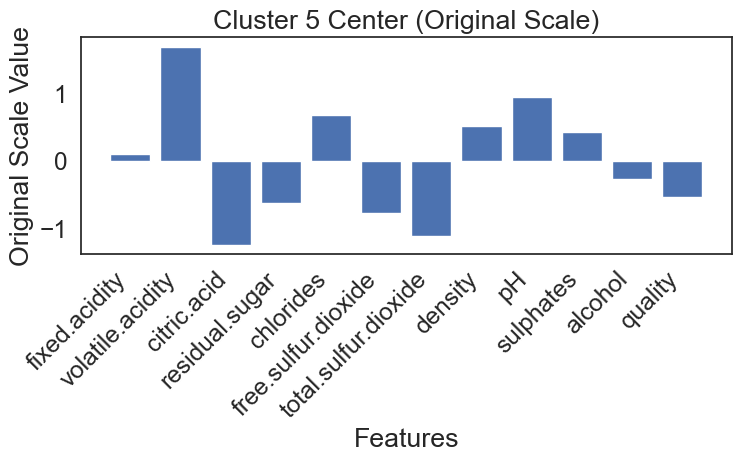

Cluster 6 Center (Original Scale):
fixed.acidity           0.745630
volatile.acidity        1.052254
citric.acid             1.219063
residual.sugar         -0.467099
chlorides               8.794542
free.sulfur.dioxide    -0.687001
total.sulfur.dioxide   -0.692556
density                 0.756927
pH                     -0.840790
sulphates               3.480389
alcohol                -0.783399
quality                -0.694356
dtype: float64



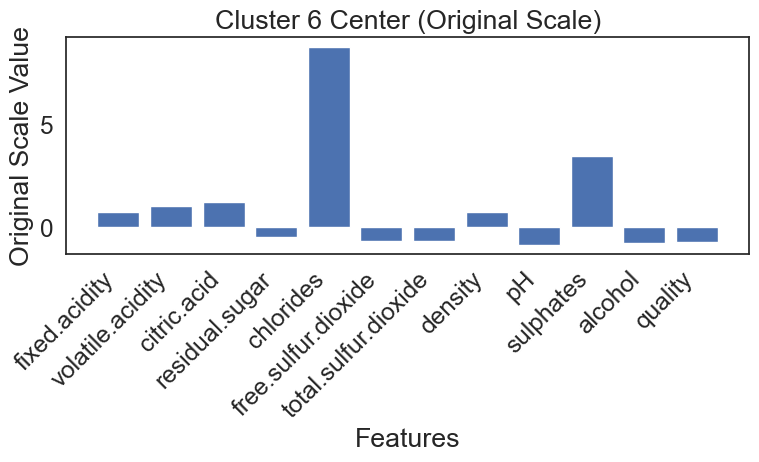

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve cluster centers
cluster_centers = kmeans_6.cluster_centers_

# Display cluster centers with numbers and plots
for i, center in enumerate(cluster_centers):
    # Calculate values in original scale
    original_center = center * sigma + mu
    
    print(f"Cluster {i+1} Center (Original Scale):")
    print(original_center)
    print()
    
    # Create a bar plot to visualize cluster center
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(original_center)), original_center, tick_label=X_scaled_df.columns)
    plt.title(f'Cluster {i+1} Center (Original Scale)')
    plt.xlabel('Features')
    plt.ylabel('Original Scale Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

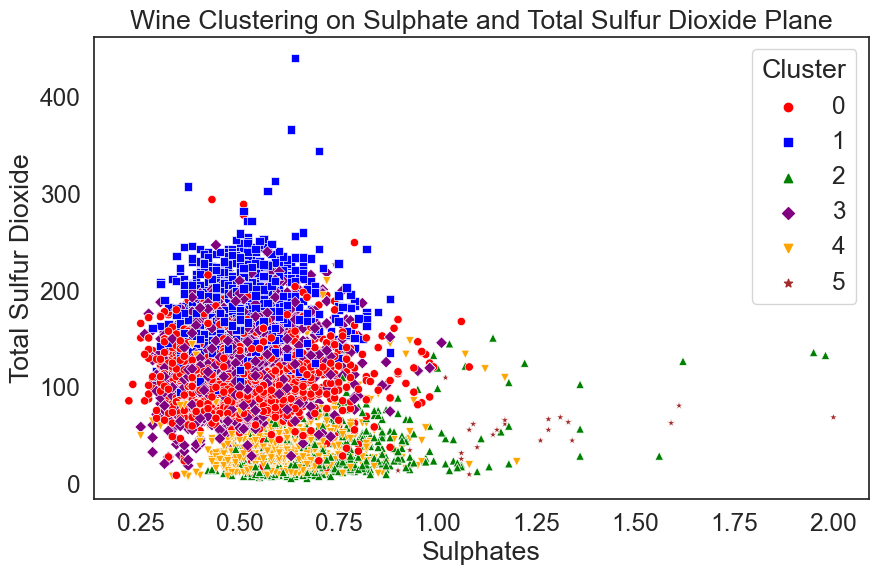

In [39]:
# Retrieve the cluster labels from the KMeans results
cluster_labels = kmeans_6.labels_

# Define a more visible color palette and shape markers
cluster_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'brown'}
cluster_markers = {0: 'o', 1: 's', 2: '^', 3: 'D', 4: 'v', 5: '*'}

# Add the cluster labels to the DataFrame
wineData['cluster'] = cluster_labels

# Create a scatter plot with enhanced color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wineData, x='sulphates', y='total.sulfur.dioxide', hue='cluster', style='cluster', palette=cluster_palette, markers=cluster_markers)
plt.title('Wine Clustering on Sulphate and Total Sulfur Dioxide Plane')
plt.xlabel('Sulphates')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Cluster')
plt.show()

### Hierarchial Clustering

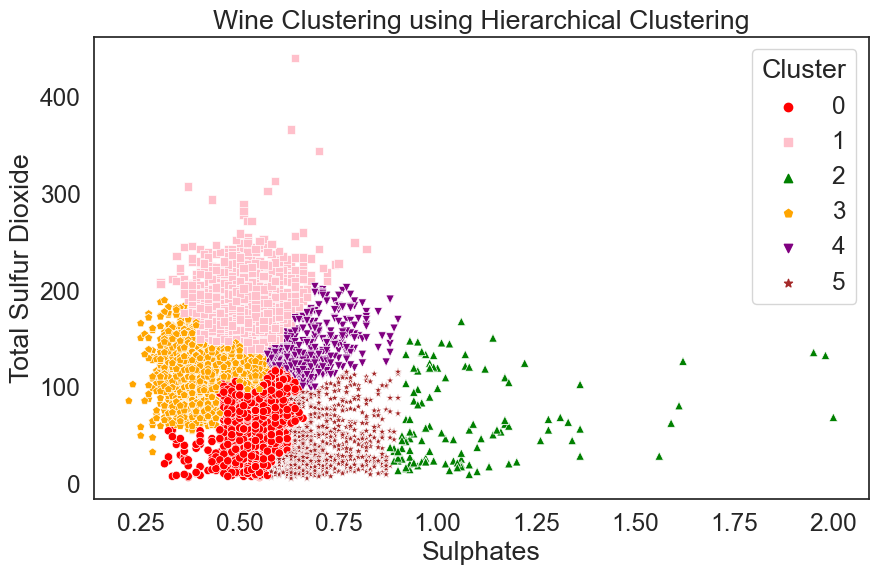

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load or prepare your wine data

# Select the columns for clustering
X = wineData[['sulphates', 'total.sulfur.dioxide']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
num_clusters = 6  # You can adjust the number of clusters
agclustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agclustering.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
wineData['cluster'] = cluster_labels

# Define a color palette and shape markers
cluster_palette = {0: 'red', 1: 'pink', 2: 'green', 3: 'orange', 4: 'purple', 5: 'brown'}
cluster_markers = {0: 'o', 1: 's', 2: '^', 3: 'p', 4: 'v', 5: '*'}

# Create a scatter plot with hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wineData, x='sulphates', y='total.sulfur.dioxide', hue='cluster', style='cluster', palette=cluster_palette, markers=cluster_markers)
plt.title('Wine Clustering using Hierarchical Clustering')
plt.xlabel('Sulphates')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Cluster')
plt.show()

## Final Conclusion

1) If the task is to distinguish between red and white wines, then both PCA and t-SNE seem to be promising based on the visual evidence provided. But if we were to compare, t-SNE appears to outperform PCA in differentiating between red and white wines.

2) However, when it comes to distinguishing wines based on quality, both PCA and t-SNE fall short. Differentiating wines based on quality using unsupervised techniques is more challenging, given the provided visualizations. The wine's quality does not seem to be closely related to the primary components or clusters of the chemical properties.

The accuracy from the K-means clustering also provides more confidence in our analysis.

Future work - It would be useful to experiment further with different cluster numbers for K-means and hierarchical clustering, with the goal to identify distinct wine quality groups or to explore more nuanced patterns in the dataset.